# Uygulama Notları: 7
## FİZ219 - Bilgisayar Programlama I | 23/11/2019

**Monte Carlo yöntemi ile Pi sayısının kestirimi**
* Rastgele sayılar (`rand`)
* Filtreleme
* Grafiklerde eksen aralıkları (`axis`)
* Vektörlerin boyunu hesaplamak (`norm`)

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Monte Carlo Yöntemleri
Analitik çözümü olmayan ya da olsa da zor olan problemlerin çözümünde rastgele sayıların kullanıldığı yöntemlere _Monte Carlo_ yöntemleri denir. Yöntem ismini, Fransa ile İtalya sınırının arasında yer alan Monaco Krallığı'nın kumarhaneleri ile ünlü Monte Carlo kentinden almaktadır. Bu uygulamada rastgele sayılar kullanarak $\pi$ sayısını kestirmeye çalışacağız.

### Rastgele sayılar
Octave'da rastgele sayılar İngilizce'de _rastgele_ anlamına gelen "random" kelimesinden `rand` olarak türetilen komutla çağrılır. `rand` komutu her çağrılışında 0 ile 1 arasında "düzgün olasılık dağılımına" (_uniform distribution_) uygun bir sayı döndürür.

In [1]:
rand % Bir kere çağıralım

ans =  0.55072


In [2]:
% 10 kere çağıralım:
for i=1:10
    rand
endfor

ans =  0.96052
ans =  0.23647
ans =  0.82555
ans =  0.46225
ans =  0.50250
ans =  0.91474
ans =  0.13897
ans =  0.45764
ans =  0.61583
ans =  0.81164


`rand` komutuna parametre olarak satır ve sütun sayısını verip, o boyutta bir matrisin rastgele değerlerle doldurulmasını sağlayabiliriz:

In [3]:
% 5x4'lük bir matrisi rastgele sayılarla dolduralım:
m = rand([5,4])

m =

   0.921103   0.326028   0.250862   0.899456
   0.155260   0.667749   0.969621   0.259840
   0.571137   0.205044   0.203361   0.191396
   0.600883   0.533503   0.139066   0.585742
   0.728163   0.975689   0.069948   0.886183



### "Aynı" rastgele sayılar
Bilgisayarda ürettiğimiz rastgele sayılar, belirli fonksiyonların sonucu olduklarından, aslında hiçbir zaman ideal olarak rastgele olamazlar. Rastgele sayıların üretiminde bilgisayarlar o sıradaki işlemci ısısı, günün saati, besleme voltajinın dalgalanma değeri gibi anlık ve değişken parametreleri bir arada yoğurup, bu değeri rastgele sayı üreticinde "tohum" (_seed_) olarak kullanır. Rastgele sayı üreteç fonksiyonunun özelliği, birbirine çok yakın iki değerden çok farklı iki sonuç üretmesidir.

Bazı durumlarda, ürettiğimiz rastgele sayıları aynı şekilde tekrarlanabilmesini isteriz (örn., Monte Carlo yöntemleri içeren bir çalışmanın bir başka kişi tarafından kontrol edilebilmesi, veya sınıfta/dökümanlarda verdiğiniz örneklerin sonrasında öğrenciler tarafından aynen yapılabilmesi maksadı ile). Bu gibi durumlarda, üretecin kullanacağı tohumu biz gireriz, bunu da, "seed" parametresi ile yaparız.

In [4]:
% An itibarı ile üretecin tohumu rastgele bir sayı, 
% dilersek bunu öğrenebiliriz:
mevcut_tohum = rand("seed")

mevcut_tohum =   8.7002e-311


In [5]:
% Şimdi elimizle bir tohum değeri (219 olsun) girip,
% 10 tane rastlantısal sayı üretelim:
rand("seed",219)
for i=1:10
    rand
endfor

ans =  0.65708
ans =  0.014786
ans =  0.15056
ans =  0.51622
ans =  0.22114
ans =  0.44253
ans =  0.57650
ans =  0.43923
ans =  0.64676
ans =  0.30993


In [6]:
% Herhangi bir başka zamanda, hatta bir başka bilgisayarda, 
% tohuma aynı değere atayıp, yine aynı sayıları elde edebiliriz:
rand("seed",rand) % Önce rastgele bir tohum atayalım
m = rand([2 5])

m =

   0.50165   0.75778   0.84164   0.18015   0.22673
   0.72982   0.80006   0.53716   0.51835   0.39345



In [7]:
% Şimdi ise tekrardan bir önce atadığımız değeri yazıp,
% yine çalıştıralım:
rand("seed",219)
m = rand([5 2])

m =

   0.657083   0.442527
   0.014786   0.576504
   0.150560   0.439225
   0.516222   0.646758
   0.221140   0.309934



Görüldüğü üzere, tekrardan geçen seferki tohum değeri atandığında üretilen rastgele sayılar gelmektedir.

## Pi sayısının olasılıktan bulunması
Kare şeklindeki bir kutuyu şekildeki gibi dört eşit parçaya böldüğümüzü düşünelim:
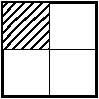

Bu karenin içine rastgele şekilde bir taş attığımızda, taşın kareli bölgeye düşme ihtimali: 1/4'tür (yani 0.25, yani %25). Eğer karenin üst yarısı taralı olsaydı, bu durumda attığımız taşın bu taralı bölgeye düşme ihtimali %50 olacaktı. İlgilendiğimiz <u>bölgenin alanı</u> ne kadar büyükse, taşın oraya düşme ihtimali de bölgenin alanı ile doğru orantılı olduğundan o oranda yüksek olur.

Bu sefer, bir karenin içine, ona kenarlarından teğet bir daire yerleştirelim:
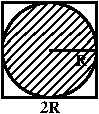

Dairenin yarıçapı R ise, karenin bir kenarı 2R olacaktır. Sistemimizi kare şeklindeki bir tepsinin içine yerleştirilmiş dairesel bir tabak olarak düşünelim. Sonrasında tümüyle ince bir kum tabakası ile kaplayıp, dışarıya, tek-tük çizeleyen yağmurun altına koyalım - böylelikle her düşen yağmur damlası, sayılabilir bir iz bırakacaktır. Biraz önceki yorumlamamızdan, dairenin içine denk gelecek yağmur damlaları sayısının karenin içine denk gelen (yani toplam) yağmur damlaları sayısına oranı, dairenin alanının karenin alanına oranı olur: \begin{equation*}\frac{n_{daire}}{n_{kare}}=\frac{S_{daire}}{S_{kare}} = \frac{\pi R^2}{(2R)^2} = \frac{\pi}{4}\end{equation*}

Bu denklemden $\pi\$'yi çektiğimizde: 

\begin{equation*}\pi = 4 \frac{n_{daire}}{n_{kare}} \end{equation*} 

eşitliğine ulaşırız.

## Rastgele atışlar (_Yağmur damlası üreteci_ 8)
Kare tepsimizin kenar uzunluğunu 1 birim olarak düşünelim, merkezini de orijine oturttuğumuzu. Bu durumda karenin içine düşen bir yağmur damlasının koordinatları $-0.5\le x\le 0.5; -0.5\le y\le0.5$ (ya da kısa gösterimle: $-0.5\le \{x,y\}\le 0.5$) olacaktır.

10 tane yağmur damlasını rastgele düşürelim. Her birinin düştüğü noktanın koordinatının bir x, bir de y bileşeni olacağına göre 10 adet sayı çiftinden bahsediyoruz:

In [8]:
rand("seed",219) % böyle başlayalım ki, sizde de, burada da aynı
                   % sayılar üretilsin.
xy = rand([10,2])

xy =

   0.657083   0.452629
   0.014786   0.964740
   0.150560   0.310487
   0.516222   0.423140
   0.221140   0.742505
   0.442527   0.492505
   0.576504   0.140481
   0.439225   0.157931
   0.646758   0.746182
   0.309934   0.588177



Fark edeceğiniz üzere, koordinatlar planladığımız gibi [-0.5,0.5] aralığında değil de, rand'ın yapısı gereği [0,1] arasında. Sorun değil, zira bütün değerlerden 0.5 çıkartırsak, istediğimiz aralığa erişmiş oluruz:
\begin{equation*} 0\le rand \le 1\\
-0.5\le rand - 0.5 \le 0.5 \end{equation*}

In [9]:
xy = xy - 0.5

xy =

   0.1570832  -0.0473714
  -0.4852144   0.4647396
  -0.3494398  -0.1895126
   0.0162219  -0.0768603
  -0.2788600   0.2425045
  -0.0574735  -0.0074946
   0.0765038  -0.3595189
  -0.0607748  -0.3420686
   0.1467575   0.2461822
  -0.1900656   0.0881769



Bu noktaları çizdirmek istersek, x değerlerini xy matrisinin ilk sütunundan; y değerlerini ise xy matrisinin ikinci sütunundan alarak:

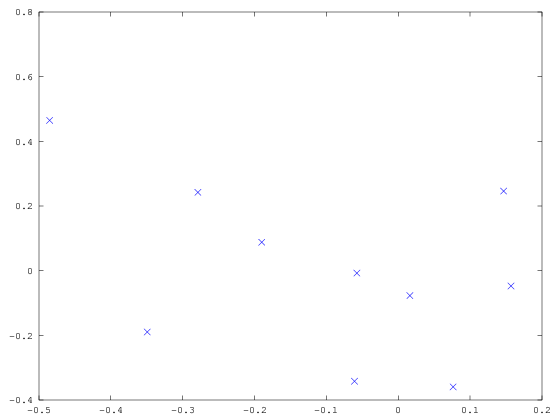

In [10]:
plot(xy(:,1),xy(:,2),"xb")

Biz aksini belirtmediğimiz sürece, Octave grafiğin eksen aralıklarını, eldeki verileri mümkün mertebe en iyi şekilde gösterecek şekilde seçer (örneğimizde seçmiş olduğu $-0.5 \le x \le0.2$ ve $-0.4 \le y \le 0.8$ gibi). Tercih ettiğimiz aralığı `axis` komutu ile belirtiyoruz:

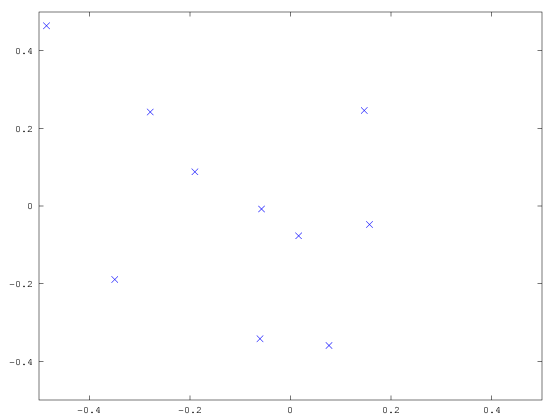

In [11]:
plot(xy(:,1),xy(:,2),"xb")
axis([-0.5 0.5 -0.5 0.5])

`axis` komutu parametre olarak -en genel haliyle- 4 elemanlı bir listeyi kabul eder:
`axis([x_min x_max y_min y_max])`

Örneğin `axis([-4.1 5.6 0.2 7.2])` komutu, mevcut grafiğin x eksenini -4.1'den 5.6'ya; y eksenini de 0.2'den 7.2'ye kadar olacak şekilde çizdirir.

## Dairenin içine düşen yağmur damlalarının saptanması
Bir önceki bölümde ürettiğimiz 10 yağmur damlası ile devam edelim: bunların kaçı dairenin içinde? İpucu olması açısından, damlalarımızı bu sefer, orijin ile beraber çizelim:

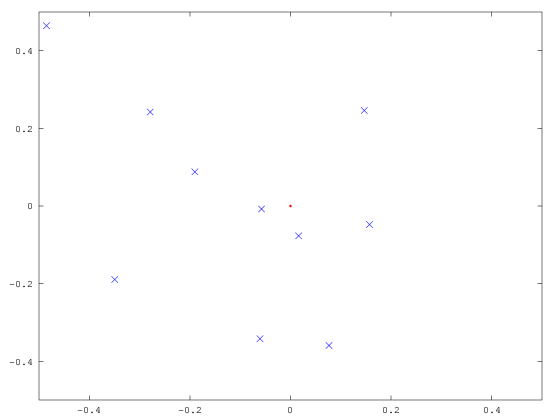

In [12]:
plot(xy(:,1),xy(:,2),"xb",0,0,"r.")
axis([-0.5 0.5 -0.5 0.5])

Orijini çizmek için, küçük bir hile yapıp, onu (0,0) şeklinde tek bir elemanı olan bir veri olarak tanımlayıp, kırmızı bir nokta şeklinde çizdirdik! 8)

Peki hangi noktalar daire içinde kalıyor? 

Çok pratik olmasa da, grafiksel olarak bakalım diye, 0.5 yarıçapında bir daire çizip, öyle kontrol edebiliriz (bunun için parametrik takılıp, x'i $0.5Cos(t)$, y'yi de $0.5Sin(t)$ olarak tanımlayacağız):

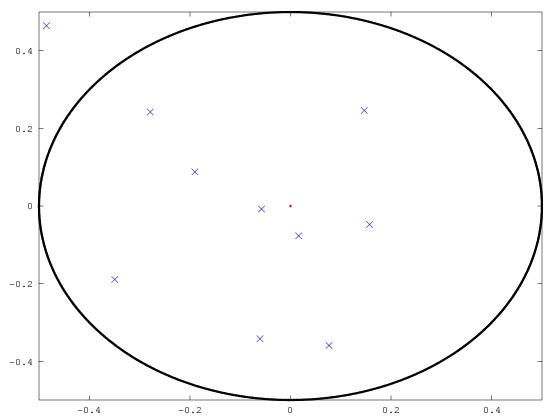

In [13]:
t = linspace(0,360,1000);
xx = 0.5*cosd(t);
yy = 0.5*sind(t);
plot(xy(:,1),xy(:,2),"xb",0,0,"r.",xx,yy,"k.")
axis([-0.5 0.5 -0.5 0.5])

Görünüşe göre, sol üstteki nokta hariç, 9 yağmur damlası dairemizin  içine düşmüş. Bu durumda: $pi = 4 \cdot \frac{9}{10} = 3.6$ -- bildiğimiz $\pi$ değerine pek yakın değil, ama olsun, başlangıç için idare eder.

Gelelim hangi noktaların dairenin içine düştüğünün _analitik_ olarak tespitine: dairenin yarıçapı 0.5 ve merkezi orijinde olduğuna göre, dairenin içinde kalan bütün noktaların orijine uzaklığı (_d_): $d\le0.5$ olmalı.

`xy` noktalar setimizin ilk elemanını ele alalım (bu noktaya a diyelim):

In [14]:
a = xy(1,:)

a =

   0.157083  -0.047371



Bu noktayı şu şekilde bileşenleri cinsinden gösterebiliriz:
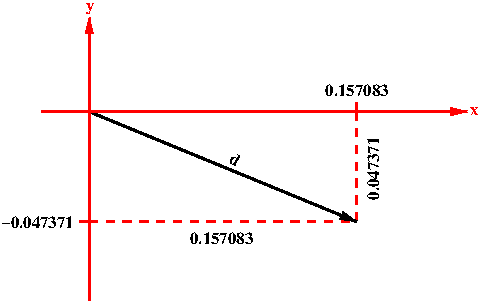

Orijine olan _d_ mesafesi de Pisagor teoreminden kolaylıkla hesaplanır:

In [15]:
d = sqrt(a(1).^2 + a(2)^2)

d =  0.16407


## Bir vektörün boyunu hesaplamak 
İki boyutlu bir $\vec{a}$ vektörümüz olsun. Bu vektörü bildiğimiz üzere, bileşenleri cinsinden yazarsak: $\vec{a} = a_x \widehat{\textbf{i}} + a_y \widehat{\textbf{j}}$. Vektörün boyu -yukarıda da gördüğümüz üzere- Pisagor teoremi uyarınca, bileşenlerinin karelerinin toplamının kökü olarak verilir. Yukarıdaki örneğimizden devam edersek:

In [16]:
a % a, 2 boyutlu bir vektör: ilk bileşen x, ikincisi y bileşeni

a =

   0.157083  -0.047371



Pisagor'dan hesaplarsak:

In [17]:
d = (a(1).^2 + a(2).^2).^(1/2)  % Kök işleminin sayının 1/2. kuvveti olduğunu unutmayın!
d = (a(1).^2 + a(2).^2).^(0.5)  % Burada da 1/2 yerine 0.5'i doğrudan yazdık

d =  0.16407
d =  0.16407


iki işlem arasında bizim açımızdan hiçbir fark yok -- ha (1/2). kuvveti aldırmışız, ha (0.5). kuvvetini... Halbuki, bilgisayar açısından epey bir fark var: kuvvet olarak (1/2) yazdığımızda, kuvvet işlemine gitmeden önce, ek bir işlem olarak 1/2 hesaplanıyor, 0.5 bulunuyor ve ondan sonra kuvvet işlemi uygulanıyor. 1 tane vektörde bu pek bir şey fark ettirmese de, bir milyon vektörün boyunu hesaplatırken boş yere fazladan bir milyon işlemi yaptırmış oluyoruz. 

Bir de hazır tanımlı olarak gelen `sqrt` karekök bulma fonksiyonu ile hesaplatalım:

In [18]:
d = sqrt(a(1).^2 + a(2).^2)

d =  0.16407


Sonuç şaşırtıcı değil ama emin olun ki, özelleştirilmiş bir durumu (bizim durumumuzda üs almanın üssün 0.5'e özelleştirilmiş durumu) karşılayan fonksiyonlar her zaman için daha hızlı çalışır, zira sıklıkla kullanıldıkları için kendilerine özel bir fonksiyon tanımlanmış ve mümkün mertebe işlemleri bu özel koşullar altında optimize edilmiştir. O yüzden her zaman için özel bir iş için tanımlı komutlar varsa, onlardan faydalanmalıyız.

Vektör boylarını hesaplamak konusunda biraz daha düşünelim. Yukarıda Pisagor teoremi doğrultusunda bu işi yaptık (3-boyutta Pisagor teoremi: $d=\sqrt{a_x^2 + a_y^2 + a_z^2}$ ile verilir). Vektörlerdeki skaler çarpımdan biliyoruz ki: $\vec{a} \cdot \vec{b} = a_x b_x + a_y b_y + a_z b_z$. $\vec{a}$, kendisi ile skaler çarpıldığında ise bir önceki açık çarpım ifadesi şu hale gelir: $\vec{a} \cdot \vec{a} = a_x^2 + a_y^2 + a_z^2$, o halde: $ d = \sqrt{\vec{a} \cdot \vec{a}} = \sqrt{\vec{a}^2}$.

Octave'da skaler vektörü çarpımının `dot` komutu ile yapıldığını görmüştük, o zaman:

In [19]:
d = sqrt(dot(a,a))

d =  0.16407


Vektörlerle uğraştığımız için, tek amacı vektörlerin boyunu bulmak olan, bu konuda optimize edilmiş, hazır bir komut var: `norm`

In [20]:
d = norm(a)

d =  0.16407


<u>**Özet olarak:**</u> Vektörlerin boyunu hesaplamak için `norm` kullanmamız en verimli yöntem olmaktadır.

## Noktalarımızın orijine uzaklıkları <br>(_ya içindesindir çemberin, ya da dışında yer alacaksın..._)
Noktalarımızı bir hatırlayalım:

In [21]:
xy

xy =

   0.1570832  -0.0473714
  -0.4852144   0.4647396
  -0.3494398  -0.1895126
   0.0162219  -0.0768603
  -0.2788600   0.2425045
  -0.0574735  -0.0074946
   0.0765038  -0.3595189
  -0.0607748  -0.3420686
   0.1467575   0.2461822
  -0.1900656   0.0881769



Matrise körlemesine `norm` çektiğimizde beklemediğimiz bir sonuçla karşılaşıyoruz:

In [22]:
norm(xy)

ans =  0.90029


Halbuki bizim aklımızdan, şuna benzer bir etki geçiyordu:

In [23]:
for i = 1:10
    norm(xy(i,:))
endfor

ans =  0.16407
ans =  0.67187
ans =  0.39752
ans =  0.078554
ans =  0.36956
ans =  0.057960
ans =  0.36757
ans =  0.34743
ans =  0.28661
ans =  0.20952


Benzer bir sonucu, xy matrisimizin sütun bileşenlerinin karelerini toplayıp kökünü alarak da bulabilirdik (bu yol çok verimli olmasa da):

In [24]:
sqrt(xy(:,1).^2 + xy(:,2).^2)

ans =

   0.164071
   0.671875
   0.397521
   0.078554
   0.369556
   0.057960
   0.367569
   0.347426
   0.286607
   0.209523



`norm(xy)` dediğimizde bize verdiği `0.90029` da neyin nesi? (şimdilik bir kenara bırakmak kaydıyla: matrisin kompleks eşlenik transposesi ile çarpıldığında ortaya çıkan sonucun en büyük özdeğerinin kökü, bir başka deyişle (ve gördükten hemen sonra unutmak şartıyla):

In [25]:
xyxy = (xy'*xy)
lambdalar = eig(xyxy)
sqrt(lambdalar)
max(sqrt(lambdalar))

disp("--------------------")

% ya da tek satirda hepsini toplarsak:
max(sqrt(eig(xy'*xy)))  % bir matrisin 2. dereceden norm'u

xyxy =

   0.53075  -0.22250
  -0.22250   0.63356

lambdalar =

   0.35379
   0.81052

ans =

   0.59481
   0.90029

ans =  0.90029
--------------------
ans =  0.90029


Dediğimiz gibi, bu kısmı şimdilik hiç bilmiyormuş gibi yapacağız (kuantum mekaniğinde kullanmak üzere özdeğerleri ve özvektörleri öğreninceye kadar! 8).

Başkaları da `norm` komutunu bizim kafamızdaki amaç gibi kullanmak istemişler ki, bizim gibiler için özel bir parametre ile çağrılınca o şekilde çalışmasına karar verilmiş:

In [26]:
mesafeler = norm(xy,"rows")

mesafeler =

   0.164071
   0.671875
   0.397521
   0.078554
   0.369556
   0.057960
   0.367569
   0.347426
   0.286607
   0.209523



Bu değerlerin az yukarıda `for` döngüsü ile satır satır ilerleyerek hesaplattığımız sonuçlarla aynı olduğunu teyit edin. _(...ve, tahmin edeceğiniz üzere, `norm` komutunu "columns" parametresi ile çağırsaydık, bu sefer de satır satır değil, sütun sütun ilerleyip, 10 boyutlu iki adet sütun vektörün boylarını hesaplayacaktı)._

## Filtreleme (Eleme)
Artık elimizde her bir noktanın orijine olan mesafesi var, o mesafeleri de `xy` matrisimize üçüncü sütun ekleyip, kısa bir süreliğine bir kenara kaldıralım:

In [27]:
xy = [xy mesafeler]

xy =

   0.1570832  -0.0473714   0.1640706
  -0.4852144   0.4647396   0.6718749
  -0.3494398  -0.1895126   0.3975213
   0.0162219  -0.0768603   0.0785536
  -0.2788600   0.2425045   0.3695556
  -0.0574735  -0.0074946   0.0579600
   0.0765038  -0.3595189   0.3675686
  -0.0607748  -0.3420686   0.3474256
   0.1467575   0.2461822   0.2866068
  -0.1900656   0.0881769   0.2095235



Bu uygulama notlarının 4.sünde, `while` komutunu incelerken, kriter olarak kullanmak üzere, bilgisayara birtakım önermelerde bulunup, doğruluğunu sormuştuk, doğrudan oradan alıntılarsak:

* 3, 1'den büyüktür: 3 > 1
* 5, 4'ten küçüktür: 5 < 4
* 12, 13'ten küçük veya eşittir: 12 <= 13
* 12, 12'den büyük veya eşittir: 12 >= 12
* 3, 7'ye eşit değildir: 3 != 7
* 7, 7'ye eşittir: 7 == 7
* 3, 5'e eşittir: 3 == 5

In [28]:
3 > 1
5 < 4
12 <= 13
12 >= 12
3 != 7
7 == 7
3 == 5

ans =  1
ans = 0
ans =  1
ans =  1
ans =  1
ans =  1
ans = 0


Octave'ın bize verdiği yanıtlar **Doğru** (True, 1) ya da **Yanlış** (False, 0) olmakta idi. Bu kısımda bu önermeleri her seferinde bir tane olmaktan kurtarıp, topluca matrislere uygulayacağız.

Elimizde 20 ile 70 arasındaki rastgele tam sayılardan oluşan 10 elemanlı bir küme olsun. Bu kümeyi `rand` komutunu kullanıp, 1x5'lik bir küme oluşturup, 50 ile çarpıp, ona da 20 ekleyip sonrasında da tam sayılara yuvarlayarak (yani: `round(rand([1 10]) * 50 + 20)`) elde edebiliriz ama yorulmayalım diye bu iş için özel bir fonksiyon tanımlamışlar: `randi`

In [29]:
rand("seed",219) % Başlamadan biz yine tohumu ayarlayalım her ihtimale karşı ki,
                 % sizin üreteceğiniz sayılar buradakilerle aynı olsunlar.
sayilar = randi([20 70],[1 10]) % 20 ile 70 arasında (onlar da dahil), 1x10'luk matris doldur

sayilar =

   53   20   27   46   31   42   49   42   52   35



Şimdi önermelerimizi hazırlayalım:
* `sayilar` kümesindeki sayılardan hangileri 46'ya eşit?
* `sayilar` matrisindeki sayılardan hangileri 46'dan küçük veya ona eşit?

In [30]:
sayilar == 46

ans =

   0   0   0   1   0   0   0   0   0   0



In [31]:
sayilar <= 46

ans =

   0   1   1   1   1   1   0   1   0   1



Gördüğümüz üzere, önermemizce doğru olan sayıların yerleri, sonuç matrisinde "doğru"yu temsil eden "1" ile dolduruluyor.

Peki, `sayılar` matrisinde 46'dan küçük veya ona eşit sayı olduğunu nasıl buluruz? Çok kolay, "1"leri toplarız:

In [32]:
sum(sayilar<=46)

ans =  7


Bir önermenin sonucu olarak döndürülen 1/0 (Doğru/Yanlış) listesi Octave tarafından özel olarak ele alınır (yani bizim oluşturacağımız, tamamıyla aynı görünen [0  1  1  1  1  1  0  1  0  1] listesinden işlevsel olarak farklıdır. Bunu hem tanım tipinden, hem de işlevinden ayırt edebiliriz:

In [33]:
onerme_sonucu_gelen  = sayilar<=46
bizim_tanimladigimiz = [0 1 1 1 1 1 0 1 0 1]

onerme_sonucu_gelen =

   0   1   1   1   1   1   0   1   0   1

bizim_tanimladigimiz =

   0   1   1   1   1   1   0   1   0   1



Aralarındaki boşlukları bir kenara bırakırsak, epey benzer görünüyorlar ama bir de şöyle inceleyelim:

In [34]:
typeinfo(onerme_sonucu_gelen)
typeinfo(bizim_tanimladigimiz)

ans = bool matrix
ans = matrix


`bool matrix` terimi, önermenin sonucu olarak gelen değerlerin, doğru/yanlış şeklinde, _mantıksal_ değer olarak tanımlandığını bildiriyor, yani alalade bir matris değil, öyle de davranıyor:

In [35]:
sayilar([4:7 9]) % sayilar'in 4.,5.,6.,7. ve 9. elemanı

ans =

   46   31   42   49   52



Bu eleman çağrılmasında sürpriz yok, bir de şuna bakalım:

In [36]:
sayilar(onerme_sonucu_gelen)

ans =

   20   27   46   31   42   42   35



**!!!**

Az evvel ilk filtrelememizi yapmış bulunmaktayız. Hatırlarsanız, `onerme_sonucu_gelen` listesini, `sayilar` listesinin _46'ya eşit veya ondan küçük_ elemanlarını sorunca verdiği cevap olarak atamıştık. `sayilar` listesinin elemanlarını bu **filtre** ile çağırdığımızda da sadece o filtreyle uyumlu elemanlar döndürüldü!

Octave, işlemlerden önce, değişkenlerin değerlerini yerleştirdiği için üstteki komutla, açık yazıldığı aşağıdaki şekli arasında işlem açısından hiçbir fark yok:

In [37]:
sayilar(sayilar<=46)

ans =

   20   27   46   31   42   42   35



Hazır başlamışken, birkaç örnek daha yapalım:

In [38]:
ciftler = sayilar(mod(sayilar,2)==0) % sayilar listesinin çift elemanları
ucun_katlari = sayilar(mod(sayilar,3)==0) % sayilar listesinin üçe tam bölünebilen elemanları
ortalamanin_altindakiler = sayilar(sayilar< sum(sayilar)/columns(sayilar)) % sayilar listesinin
                                                             % ortalamasının altındaki elemanları
tam_kareler = sayilar(sqrt(sayilar)-floor(sqrt(sayilar))  == 0) % sayilar listesinin tam kare elemanları

ciftler =

   20   46   42   42   52

ucun_katlari =

   27   42   42

ortalamanin_altindakiler =

   20   27   31   35

tam_kareler =  49


(Bir listenin ortalamasını: listenin toplamını, listenin eleman sayısına uzun uzun bölmek yerine, doğrudan `mean` komutu ile de elde edebiliriz. Bir de, tam karelerin hesabı biraz karışık gelebilir ama orada da sayının karekökünü alıp, `floor` komutu ile ona alttan yakın en büyük tam sayı değerine yuvarladığımız halinden çıkarıp, onun sıfıra eşit olup olmadığına baktık: örneğin sayı 27 ise kökü: 5.1962, onun yuvarlandığı ona alttan yakın en büyük tam sayı değeri: 5 olup, aralarındaki fark: 0.1962 oluyor ki, demek ki tam kare değilmiş. Halbuki 49'un kökü: 7.0000, onun yuvarlandığı ona alttan yakın en büyük tam sayı da 7 olunca, fark: 0 oluyor, yani hesap ilk başta karışık gelse de, basit aslında. (`floor`, `ceil` ve `round`u ileride daha sık göreceğiz))

Bu işlemlerde göz önünde bulundurmamız gereken asıl liste, her önermenin bir **filtre** döndürdüğüdür. Bu filtreleri de illaki ilgili listede kullanmak gibi bir zorunluluğumuz yok. Filtreleri elek gibi düşünürsek, örneğin çiftleri bulmak için ürettiğimiz filtre şu şekilde:

In [39]:
mod(sayilar,2)==0

ans =

   0   1   0   1   0   1   0   1   1   0



Bu filtreyi `sayilar` kümesine uyguladığımızda, şuna benzer bir şey yapıyoruz: bir tahta alıp, 0'a karşılık gelen yerlerini kapalı tutup ('`--`'), 1'e karşılık gelen yerlerini açıyoruz ('`|  |`'), sonrasında da bunu `sayilar` kümesinin altına tutuyoruz:

`53  20   27   46   31   42   49   42   52   35
--  |  |  --  |  |  --  |  |  --  |  | |  |  --
     20        46        42        42   52`
        
yani, bir başka deyişle filtreleri bir "maske", "şablon" ya da "elek" gibi düşünebiliriz. Elimizdeki bu eleği, bambaşka bir listenin de altına tutabiliriz, örneğin 1'den 10'a kadar olan sayılar listesinin altına tutalım:

`1    2    3    4    5    6    7    8    9   10
--  |  |  --  |  |  --  |  |  --  |  | |  |  --
      2         4         6         8    9`

In [40]:
filtre = (mod(sayilar,2) == 0)
sayilar(filtre)
[1:10](filtre)

filtre =

   0   1   0   1   0   1   0   1   1   0

ans =

   20   46   42   42   52

ans =

   2   4   6   8   9



Fark ettirmeden, çok önemli bir iş yaptık: `sayilar` listesinin _kaçıncı elemanlarının_ çift olduğunu böylelikle bulmuş olduk (2., 4., 6., 8., 9. elemanları!). 

Bu vesileyle: elimizdeki filtreyi _tersine çevirmek_ (yani doğruları yanlış (1 -> 0), yanlışları doğru (0 -> 1) yapmak) için `not` komutunu kullanırız:

In [41]:
cift_sayilar_filtresi = (mod(sayilar,2) == 0)
tek_sayilar_filtresi  =  not(cift_sayilar_filtresi)
sayilar(tek_sayilar_filtresi)

cift_sayilar_filtresi =

   0   1   0   1   0   1   0   1   1   0

tek_sayilar_filtresi =

   1   0   1   0   1   0   1   0   0   1

ans =

   53   27   31   49   35



Rastgele ürettiğimiz noktalarımızın koordinatlarını ve onların orijine olan mesafelerini tuttuğumuz xy matrisimizi hatırlayıp, sonrasında bu metotu kullanalım:

In [42]:
xy

xy =

   0.1570832  -0.0473714   0.1640706
  -0.4852144   0.4647396   0.6718749
  -0.3494398  -0.1895126   0.3975213
   0.0162219  -0.0768603   0.0785536
  -0.2788600   0.2425045   0.3695556
  -0.0574735  -0.0074946   0.0579600
   0.0765038  -0.3595189   0.3675686
  -0.0607748  -0.3420686   0.3474256
   0.1467575   0.2461822   0.2866068
  -0.1900656   0.0881769   0.2095235



In [43]:
hangileri = xy(:,3) <= 0.5 % xy'nin üçüncü sütunu olan mesafelerden hangileri
               % 0.5'ten küçük veya ona eşit

hangileri =

   1
   0
   1
   1
   1
   1
   1
   1
   1
   1



In [44]:
hangi_satirlar = [1:10](hangileri) % Bu kıstası karşılayan satırlar 
                                   % hangi satırlara karşılık geliyor

hangi_satirlar =

    1    3    4    5    6    7    8    9   10



In [45]:
dairenin_icindekiler = xy(hangi_satirlar,:) % Bu satırları getir

dairenin_icindekiler =

   0.1570832  -0.0473714   0.1640706
  -0.3494398  -0.1895126   0.3975213
   0.0162219  -0.0768603   0.0785536
  -0.2788600   0.2425045   0.3695556
  -0.0574735  -0.0074946   0.0579600
   0.0765038  -0.3595189   0.3675686
  -0.0607748  -0.3420686   0.3474256
   0.1467575   0.2461822   0.2866068
  -0.1900656   0.0881769   0.2095235



Şu son üç aşamada tek tek yaptığımız işlemleri tek bir satırda birleştirelim (karmaşık görünecek ama nasıl elde ettiğimiz yukarıda -- sadece hepsini birleştirip yazıyoruz):

In [46]:
dairenin_icindekiler = xy([1:10](xy(:,3)<=0.5),:)

dairenin_icindekiler =

   0.1570832  -0.0473714   0.1640706
  -0.3494398  -0.1895126   0.3975213
   0.0162219  -0.0768603   0.0785536
  -0.2788600   0.2425045   0.3695556
  -0.0574735  -0.0074946   0.0579600
   0.0765038  -0.3595189   0.3675686
  -0.0607748  -0.3420686   0.3474256
   0.1467575   0.2461822   0.2866068
  -0.1900656   0.0881769   0.2095235



Dairenin dışındaki noktalarımızı da `not` komutunu kullanıp, şıp! diye saptarız:

In [47]:
dairenin_disindakiler = xy([1:10](not(hangileri)),:)

dairenin_disindakiler =

  -0.48521   0.46474   0.67187



## iç, dış, daire, orijin... her şeyi bir grafikte çizdirmek
Artık elimizde bütün değerler var: dairenin içerisindeki noktaları kırmızı dairelerle, dışarıda kalan noktaları mavi karelerle çizdirelim (orijini ve daireyi çizdirmeyi yukarıda yapmıştık zaten):

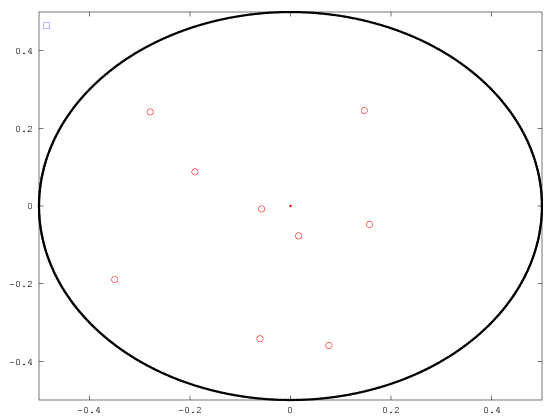

In [48]:
plot(0,0,".r",... % orijin
xx,yy,"k.",... % daire
dairenin_icindekiler(:,1),dairenin_icindekiler(:,2),"or",... % dairenin içindeki noktalar
dairenin_disindakiler(:,1),dairenin_disindakiler(:,2),"sb") % dairenin dışındaki noktalar

axis([-0.5 0.5 -0.5 0.5])

Uzun satırları üç nokta (`...`) kullanarak bölebildiğimize dikkat edin.

Çizim kısmı güzel olsa da, asıl amacımız olan $\pi$'nin hesabı açısından çok önemli değil, asıl hesabımızı da yapalım: \begin{equation*}\pi = 4 \frac{n_{daire}}{n_{kare}} \end{equation*} 

In [49]:
pi_yaklasik = 4 * rows(dairenin_icindekiler) / rows(xy)

pi_yaklasik =  3.6000


# Sonuç

Her şeyi toparlarsak, $\pi$'yi hesaplamak için yaptığımız işlemler, sırasıyla:
1. _n_ adet rasgele nokta üretip, koordinatlarını nx2'lik `xy` matrisinde depoladık. `xy`nin 1. sütununda noktaların x koordinatı; 2. sütununda y koordinatını sakladık.
2. bu noktaların orijine olan uzaklıklarını hesaplayıp, `xy`nin 3. sütununda da o değeri tuttuk
3. orijine olan uzaklığı 0.5'ten küçük (veya ona eşit) olan noktaları `dairenin_icindekiler` listesine; 0.5'ten büyük olan noktaları ise `dairenin_disindakiler` listesine koyduk.
4. $\pi$ değeri olarak `dairenin_disindakiler` listesindeki nokta sayısının, toplam nokta sayısına olan oranını bulup, 4 ile çarparak bulduğumuz sonucu atadık.
5. Grafiksel olarak inceleyebilmek için de, ilgili listeleri çizdirdik.

Bu adımları kod olarak uygularsak:

icerideki_nokta_sayisi =  784
disaridaki_nokta_sayisi =  216
toplam_nokta_sayisi =  1000
------------------------------
pi_yaklasik =  3.1360


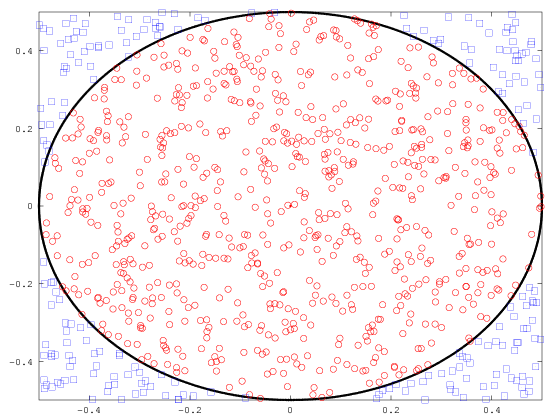

In [50]:
% Uygulama Notları: 7
% FİZ219 - Bilgisayar Programlama I | 23/11/2019
% Monte Carlo yöntemi ile Pi sayısının kestirimi
%
% Emre S. Tasci emre.tasci@hacettepe.edu.tr

% Şu ana kadar yaptığımız her şeyi silelim
% (Octave'ı yeni açmış gibi olalım):
clear;

% Sonuçların buradakilerle birebir uyuşması açısından:
rand("seed",219) 

% Toplam üretilen rastgele nokta sayısı -- bunu ne kadar
% yüksek yaparsanız, sonuç pi'ye o kadar yakınsayacaktır
n = 1000;

% Noktaları üretelim:
xy = rand([n 2]) - 0.5;

% Orijine olan mesafelerini hesaplatalım:
mesafeler = norm(xy,"rows");

% mesafeler'i xy'ye 3. sütun olarak ekleyelim:
xy = [xy mesafeler];

% mesafelerin 0.5'e eşit veya ondan küçük olduğu satırları bulalım:
dairenin_icindekiler_satirlar_filtresi = xy(:,3)<=0.5;
dairenin_icindekiler_satirlar = [1:n](dairenin_icindekiler_satirlar_filtresi);
dairenin_icindekiler = xy(dairenin_icindekiler_satirlar,:);

dairenin_disindakiler = xy([1:n](not(dairenin_icindekiler_satirlar_filtresi)),:);

% pi'yi hesaplayalım:
icerideki_nokta_sayisi = rows(dairenin_icindekiler)
disaridaki_nokta_sayisi = rows(dairenin_disindakiler)
toplam_nokta_sayisi = n
disp("------------------------------")
pi_yaklasik = 4 * icerideki_nokta_sayisi / n

% Grafiği çizdirelim:

% Dairemiz:
t = linspace(0,360,1000);
xx = 0.5 * cosd(t);
yy = 0.5 * sind(t);

plot(0,0,".r",... % orijin
xx,yy,"k.",... % daire
dairenin_icindekiler(:,1),dairenin_icindekiler(:,2),"or",... % dairenin içindeki noktalar
dairenin_disindakiler(:,1),dairenin_disindakiler(:,2),"sb") % dairenin dışındaki noktalar

axis([-0.5 0.5 -0.5 0.5])


% -------------------------------------------------------
% rastgele tohumu : 219 için sonuçlar özet:
%       n    #iç      #dış       #pi
%      10      9         1       3.6000000
%     100     80        20       3.2000000
%    1000    784       216       3.1360000
%   10000   7863      2137       3.1452000
%  100000  78649     21351       3.1459600
% 1000000 785546    214454       3.1421840
